add\
<img src="./image/QADD.png" width="50%" height="50%">\
maj & uma\
<img src="./image/MAJ_detail.png" width="30%" height="30%">
<img src="./image/UMA_detail.png" width="30%" height="30%">\

In [1]:
import numpy as np
from qiskit import *
from math import pi

class Adder:
    def __init__(self,qc,n):
        self.qc = qc
        self.n = n
        self.maj = self.MAJ()
        self.uma = self.UMA()
        
    def MAJ(self):
        sub_q = QuantumRegister(3)
        sub_circ = QuantumCircuit(sub_q, name='MAJ')
        sub_circ.cx(sub_q[2],sub_q[1])
        sub_circ.cx(sub_q[2],sub_q[0])
        sub_circ.ccx(sub_q[0],sub_q[1],sub_q[2])
        
        # Convert to a gate and stick it into an arbitrary place in the bigger circuit
        sub_inst = sub_circ.to_instruction()
        return sub_inst


        
    def UMA(self):
        sub_q = QuantumRegister(3)
        sub_circ = QuantumCircuit(sub_q, name='UMA')
        sub_circ.ccx(sub_q[0],sub_q[1],sub_q[2])
        sub_circ.cx(sub_q[2],sub_q[0])
        sub_circ.cx(sub_q[0],sub_q[1])
        
        # Convert to a gate and stick it into an arbitrary place in the bigger circuit
        sub_inst = sub_circ.to_instruction()
        return sub_inst
    
    #n位加法器 
    def add(self):
        for i in range(self.n):
            qc.append(self.maj, [qr[2*i],qr[2*i+1],qr[2*i+2]])
        self.qc.cx(2*self.n,2*self.n+1)
        for i in range(self.n):
            qc.append(self.uma,[qr[2*(n-1-i)],qr[2*(n-1-i)+1],qr[2*(n-1-i)+2]])
            
    #测量
    def measure(self):
        for i in range(self.n+1):
            self.qc.measure(2*i+1,i)

In [2]:
num1 = int(input("请输入第一个十进制数："))  # 获取用户输入的十进制数
num2 = int(input("请输入第二个十进制数："))
n1 = bin(num1)[2:]  # 使用 Python 内置函数 bin() 将十进制数转换为二进制数
n2 = bin(num2)[2:]
print(n1,n2)

list1 = list(reversed(n1))
list2 = list(reversed(n2))
print(list1,list2)
length = max(len(n1),len(n2))
print(length)


10101 10110
['1', '0', '1', '0', '1'] ['0', '1', '1', '0', '1']
5


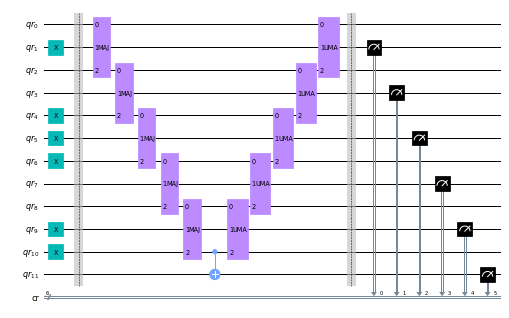

In [3]:
n = length
qr = QuantumRegister(2*n+2,'qr')
cr = ClassicalRegister(n+1,'cr')
qc = QuantumCircuit(qr,cr)

#初态制备
for i in range(len(n1)):
    if list1[i] == '1':
        qc.x(2*i+1)
for j in range(len(n2)):
    if list2[j] == '1':
        qc.x(2*j+2)
qc.barrier()

#n位加法器
adder = Adder(qc,n)
adder.add()
qc.barrier()
adder.measure()
adder.qc.draw('mpl',scale=0.5)


In [4]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

compiled = transpile(qc, simulator)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = simulator.run(compiled, shots=1024)


# Grab the results from the job.
result = job.result()
counts = result.get_counts(compiled)
print(counts)

res = []
for i in counts.keys():
    res.append(i)
print(res)


{'101011': 1024}
['101011']


In [5]:
binary_str = ''.join(str(bit) for bit in res)  # 将列表中的 0 和 1 转换为字符串并拼接起来
print(binary_str)
print(int(binary_str,2))

101011
43
